In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from torchvision import datasets, models, transforms
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

In [5]:
transform_img = transforms.Compose([
transforms.Resize((240,240)),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [29]:
img = Image.open('test/2.jpg')

In [30]:
img_t = transform_img(img).unsqueeze(0)

In [8]:
class SegmentationNet(nn.Module):
	def __init__(self):
		super(SegmentationNet, self).__init__()
		self.segnet = smp.DeepLabV3Plus(encoder_name="efficientnet-b1", encoder_weights="imagenet", in_channels=3, classes=1)
	def forward(self, x):
		x = self.segnet(x)
		return x

In [9]:
net = SegmentationNet()

In [20]:
net.eval()

SegmentationNet(
  (segnet): DeepLabV3Plus(
    (encoder): EfficientNetEncoder(
      (_conv_stem): Conv2dStaticSamePadding(
        3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
        (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
      )
      (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_blocks): ModuleList(
        (0): MBConvBlock(
          (_depthwise_conv): Conv2dStaticSamePadding(
            32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
            (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
          )
          (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (_se_reduce): Conv2dStaticSamePadding(
            32, 8, kernel_size=(1, 1), stride=(1, 1)
            (static_padding): Identity()
          )
          (_se_expand): Conv2dStaticSamePadding(
            8, 32, kernel_size=(1, 1

In [10]:
net.load_state_dict(torch.load('model_best.pth'), strict=False)

<All keys matched successfully>

In [15]:
img_t.shape

torch.Size([1, 3, 240, 240])

In [31]:
out = net(img_t)

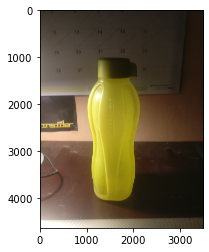

In [32]:
plt.imshow(img)

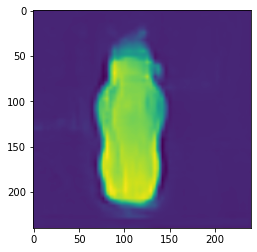

In [33]:
plt.imshow(out.detach().numpy()[0][0])